# Classification

## What is Classification?
---
### Classification Concepts
Classification is a type of supervised learning that predicts categorical values.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')

In [2]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


The Survived column is what we are trying to predict, called the __target__. The remaining columns are the information about the passengers that we can use to predict the target, each called a __feature__ (sometimes called __predictors__). While we know whether each passenger in the dataset survived, we'd like to predict for those whose data is not collected. A machine learning __model__ helps us to do this.

## A Linear Model for Classification
---
### Graphical Classification
Let's start with only two of the features (fare and age). Using two features enable us to visualize the data in a 2-D graph.

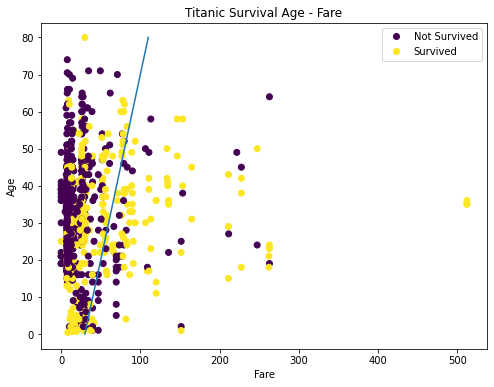

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Fare'], df['Age'], c=df['Survived'])
plt.plot([30, 110], [0, 80])  # sample linear model

plt.title('Titanic Survival Age - Fare')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend(handles=scatter.legend_elements()[0],
            labels=['Not Survived', 'Survived'])

plt.savefig('classification_titanic_demo.png')
plt.show()

_Above figure is saved locally as classification_titanic_linear.png_

On the x-axis we have the passengers' fare and on the y-axis we have their age. The yellow dots are passengers that survived and the purple dots are passengers that didn't.

There are more yellow dots at the bottom than of the graph than the top, which is probably because children were more likely to survive than aged people. Similarly there are more dots on the right of the graph, meaning people who paid more were more likely to survive.

The task of a linear model is to find the line that best separate the two classes, so that the yellow points are on one side and the purple dots are on the other. The line in the graph above is one that fits our purpose. This line can be used to make predictions about new passengers. If a passenger is left and below the line, then we predict that they survived. Otherwise, we predict that they didn't. The challenge of this model is to find the optimal line.

### Equation for the Line
A line is defined by an equation in the following form:
$$0 = ax + by + c$$

The values a, b and c are the coefficients. Any three values (not multiples of another triple) will define a unique line. Let's look at a specific example where the three coefficients are 1, -1, -30.
$$0 = (1)x + (-1)y + (-30)$$

To draw a line, we need at least two points. For example, points (30, 0) and (110, 80) lies on the line. So the line can be plotted with:
> plt.plot(\[30, 110\], \[0, 80\])

![Classification of Titanic Linear Model](classification_titanic_demo.png)

### Making a Prediction Based on the Line
If we take a passenger's data, we can use this equation to determine which side of the line they fall on. For example, let's say we have a passenger whose fare is 100 and age is 20 and another passenger whose fare is 10 and age is 50.

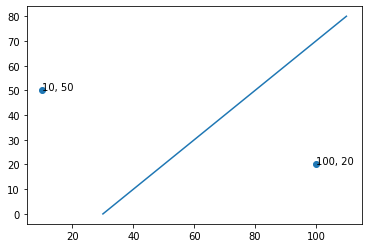

In [4]:
df_new = pd.DataFrame(({'Fare': 100, 'Age': 20},
                       {'Fare': 10,  'Age': 50}))

plt.plot([30, 110], [0, 80])  # sample linear model
plt.scatter(df_new['Fare'], df_new['Age'])
for fare, age in df_new.values:
    plt.annotate('{}, {}'.format(fare, age), (fare, age))
plt.show()

From graph, we can predict that the passenger with a fare of 100 and an age of 20 survived, whereas the other one with a fare of 10 and an age of 50 didn't survive.

### Evaluation
Let's name the line we have been working with Line 1: $0 = (1)x + (-1)y + (-30)$.

Next, we have another equation for Line 2: $0 = (4)x + (5)y - 400$, plotted below.

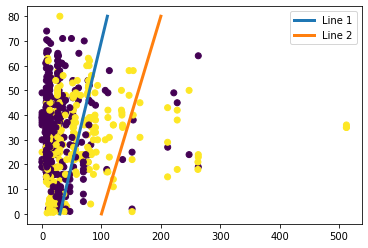

In [5]:
scatter = plt.scatter(df['Fare'], df['Age'],
                      c=df['Survived'])
plt.plot([30, 110], [0, 80],
         lw=3, label='Line 1')
plt.plot([100, 200], [0, 80],
         lw=3, label='Line 2')
plt.legend()
plt.show()

Line 1 is clearly better at this classification problem as it includes most yellow points to its one side, i.e., the right side. Line 2 doesn't have much point to the right at all.

We need a mathematical way of algorithmically determining the appropriateness of a line. Logistic regression is a way of accomplishing this.

## Logistic Regression Model
---
### Probability of Surviving
In order to determine the best possible way to split our data, we need a method of scoring a line. First, let's look at a single data point.

Ideally, if data point represents a passenger who survived, it should be on the right side of the line and far from it. If it is a data point for a passenger who didn't survive, it should be far from the line to the left. In summary, the further it is from the line, the more confident we are of the prediction.

For each data point, we'll have a score that has a value between 0 and 1. It can be thought of a probability that a passenger survived. A value of 0/1 would indicate we're confident that the passenger didn't survive/survived. On graph, it is reflected by the point being far to the left/right of the line. A value of 0.5 means the point falls directly on the line and we are uncertain if the passenger survives.

The equation that well fits the description of the score is sigmoid:
$$ \frac{1}{1+e^{-(ax+by+c)}} $$

Logistic regression yields probabilistic predictions, in this case the chance of passengers' survival.

![The sigmoid function](sigmoid.png)

_Above is the graph of the sigmoid function $f(x)=\frac{1}{1+e^x}$_ .

### Likelihood
To calculate how good our line is, we need to score whether our predictions are correct. The model should be awarded when it predicts something correctly and penalized if it predicts something incorrectly. Below is the __likelihood__ equation that gives a score.
$$likelihood=\cases{
    p & if passenger survived\\
    1-p & if passenger didn't survive}$$
    

Here, $p$ is the probability of surviving introduced in the previous section. The likelihood will also range from 0 to 1. The final score is given by the product of the scores of all data points. Below is an example:

In [6]:
def likelihood(survived, prob):
    return prob if survived else 1 - prob

prob = pd.DataFrame([[True,  .25],
                     [False, .25],
                     [True,  .6],
                     [False, .2]],
                    columns=['Survived', 'Predicted probability'])

# calculate score using above formula
prob['Score'] = list(map(likelihood, prob['Survived'], prob['Predicted probability']))

print(prob)

# calculate final score by multiplication
print('Final score:', prob['Score'].product())

   Survived  Predicted probability  Score
0      True                   0.25   0.25
1     False                   0.25   0.75
2      True                   0.60   0.60
3     False                   0.20   0.80
Final score: 0.09


_The value is always going to be small since it is the likelihood that our model predicts everything perfectly._

The likelihood is how we score and compare possible choices of a line of best fit.

## Model Building with Scikit-learn
---
The Python module named scikit-learn, ofter shortened to sklearn, implements all of the basic machine learning algorithms. It allows building a machine learning model with a few lines.
Refer to [documentation](https://scikit-learn.org/stable) for all detailed information and examples.

### Data Preparation with Pandas
Before we can use sklearn to build and train the model, we need to prep the data with pandas, so that the data is better understood by computers.

In [7]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
df['Ismale'] = df['Sex'] == 'male'
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Ismale
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


Now, we take all the features we are using to train the model and store them in a numpy array X. _For simplicity, let's only use the two features we explored - fare and age._ This is achieved by selecting all the columns we are interested in and then use `.value` to convert it into a numpy array.

In [9]:
X_2f = df[['Fare', 'Age']].values

Now, let's take the target (the Survived column) and store it in an array y.

In [10]:
y_2f = df['Survived']

### Building the Model with Sklearn
We start by importing the class and initiate an instance. Then, we train the model with data X and y.

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_2f, y_2f)

LogisticRegression()

Fitting the model means using the data and the likelihood method introduced above to choose a line of best fit. We can see the coefficients with

In [12]:
model.coef_, model.intercept_

(array([[ 0.01615949, -0.01549065]]), array([-0.51037152]))

It means that the line in $0 = ax + by + c$ form is
$$0 = 0.0161594x + -0.01549065y + -0.51037152$$

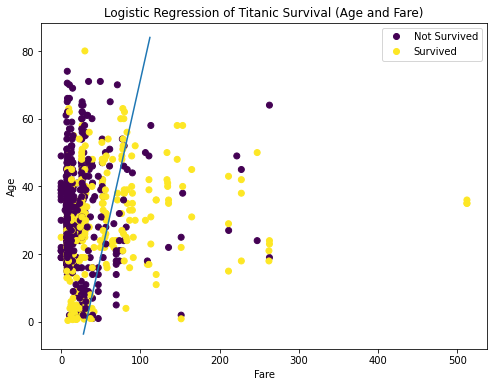

In [13]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Fare'], df['Age'], c=df['Survived'])

# calculate end points of line
a, b = model.coef_.reshape(-1)
c = model.intercept_
line_y = np.array(plt.gca().get_ylim())
line_x = -(b * line_y + c) / a
plt.plot(line_x, line_y)

plt.title('Logistic Regression of Titanic Survival (Age and Fare)')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend(handles=scatter.legend_elements()[0],
            labels=['Not Survived', 'Survived'])

plt.show()

## Making Predictions with the Model
---
We only used two features for visualization purpose. Now, let's rebuild the model with all features.

In [14]:
X = df[df.columns[[1, 7, 3, 4, 5, 6]]]
y = df['Survived']
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

We can use `.predict` to make predictions.

In [15]:
y_pred = model.predict(X)
y_pred[:5]  # show only predictions for first five

array([0, 1, 1, 1, 0])

The first passenger in the dataset is:

In [16]:
first = X.iloc[0]
first

Pclass                 3
Ismale              True
Age                   22
Siblings/Spouses       1
Parents/Children       0
Fare                7.25
Name: 0, dtype: object

The model makes the prediction that:

In [17]:
model.predict(first.values.reshape(1, -1))  # y_pred[0]

array([0])

This means that the model predicts that the passenger didn't survive.

In [18]:
y[0]

0

Our recorded data shows also that the passenger didn't survive. Our prediction is correct for the first passenger.

### Scoring the Model
Counting the number of data points it predicts correctly gives an __accuracy__ score. Let's store the predicted y values.

In [19]:
y_pred = model.predict(X)

Now, create a boolean array of whether or not the model predicted match the ground truth.

In [20]:
y_true = y == y_pred

So the accuracy is the number of true predictions divided by the total number of predictions.

In [21]:
y_true.sum() / y_true.size

0.8049605411499436

Sklearn has already implemented common calculations for us. Accuracy is given by

In [22]:
model.score(X, y)

0.8049605411499436

## Logistic Regression with Breast Cancer Dataset
---
Now we introduce another dataset.

In [23]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [24]:
type(cancer_data)

sklearn.utils.Bunch

Loaded dataset from sklearn act partially like a Python dictionary.

In [25]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [26]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

We can see that there are 30 features, 596 data points, and target is either Malignant (cancerous) or Benign (not cancerous). For each data point we have measurements of the breast mass (radius, texture, perimeter, etc.). Some features are calculated based on other columns. The process of figuring out what additional features to calculate is __feature engineering__.

### Loading Data into Pandas

In [27]:
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [28]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The 30 features is represented by 30 columns in the DataFrame. We still need to put the target data in the DataFrame.

In [29]:
df['target'] = cancer_data['target']
df.iloc[:5, -5:]  # truncate output so it fits on screen

,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.7119,0.2654,0.4601,0.11890,0
1,0.2416,0.1860,0.2750,0.08902,0
2,0.4504,0.2430,0.3613,0.08758,0
3,0.6869,0.2575,0.6638,0.17300,0
4,0.4000,0.1625,0.2364,0.07678,0


In [30]:
cancer_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In order to interpret the target values, we need to understand whether 0 or 1 is malignant or benign. Above result tells us that 0 represents malignant and 1 represent benign.

### Building a logistic regression model

In [31]:
X = df[cancer_data.feature_names].values
y = df.target.values

```
model = LogisticRegression()
model.fit(X, y)
```
Above code returns an error:

>/Users/admin/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

>Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

Convergence Warning means that the model need more time to find the optimal solution. One option to counteract this is to increase the number of iterations. We could also switch to a different solver.

In [32]:
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
model.predict([X[0]])

array([0])

The model predicts the first cancer data point to be benign.
To see the overall performance, we check the total accuracy.

In [33]:
model.score(X, y)

0.9595782073813708